In [1]:
import re

import pandas as pd
from matplotlib import mlab
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
#データの読み込み
path = "../stock_price.csv"
df = pd.read_csv(path, index_col="日付け", parse_dates=True)

# 欠損値確認
print(df.isnull().sum())

# ラベルの日本語化
df = df.rename(
    columns={
        "終値": "Close",
        "始値": "Open",
        "高値": "High",
        "安値": "Low",
        "出来高": "Volume",
        "変化率 %": "Change",
    },
    index=str,
)
df.index.name = "Date"

# 出来高は省略表現なので処理。まず、省略記号の一覧を取得。
symbols = set()
for value in df["Volume"]:
    # 正規表現を利用してre.subで置換
    symbol = re.sub(r"\d*\.?\d*", "", str(value))
    # pythonの構文で、if (str)で空文かどうか判断できる
    if symbol:  # 空文字列でない場合
        symbols.add(symbol)
        # symbols = {"B", "M"}

print(list(symbols))

# 省略表現を数値に変換するカスタムメソッド
def convert_volume(value):
    number = float(re.sub(r"[BM]", "", str(value)))
    if "B" in str(value):
        return number * 1000000000
    elif "M" in str(value):
        return number * 1000000
    else:
        return number


features = df.copy()
features["Volume"] = features["Volume"].apply(convert_volume)
features["Change"] = features["Change"].str.replace("%", "").astype(float)

['B', 'M']


Close     0
Open      0
High      0
Low       0
Volume    0
Change    0
dtype: int64

<Axes: xlabel='Date'>

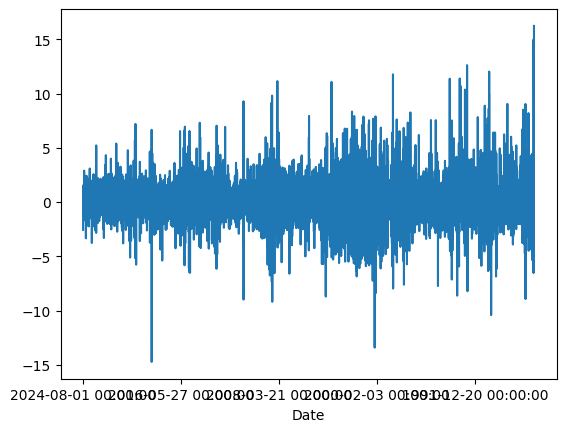

In [3]:
features["Change"].plot()

In [4]:
scaler = StandardScaler()
features_std = scaler.fit_transform(features)
features_standardized_df = pd.DataFrame(
    features_std, columns=features.columns, index=features.index
)

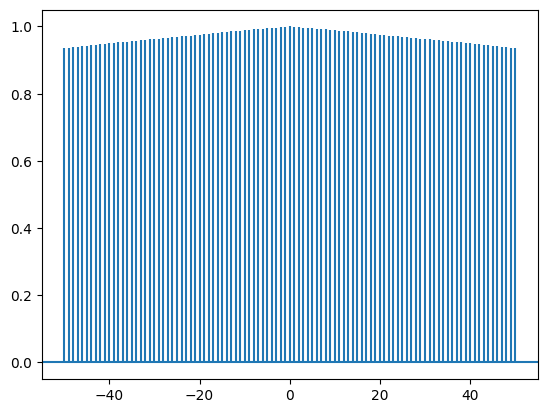

In [5]:
acor = plt.acorr(features["Close"], detrend=mlab.detrend_linear, maxlags=50)

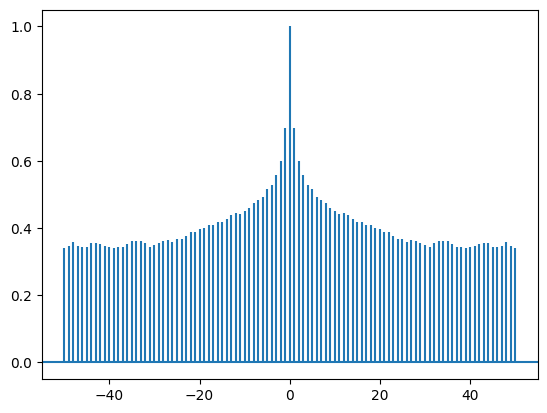

In [6]:
acor = plt.acorr(features["Volume"], detrend=mlab.detrend_linear, maxlags=50)

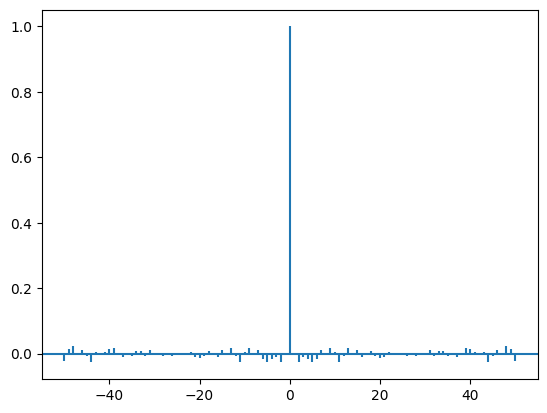

In [7]:
acor = plt.acorr(features["Change"], detrend=mlab.detrend_linear, maxlags=50)